## Import modules

In [ ]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import pandas as pd
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [ ]:
# Statistical info
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
# find unique values
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

## Preprocessing the dataset

In [ ]:
# Check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(-2.0).astype("float32")
df['Product_Category_3'] = df['Product_Category_3'].fillna(-2.0).astype("float32")

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
# encoding values using dict
gender_dict = {'F':0, 'M':1}
df['Gender'] = df['Gender'].apply(lambda x: gender_dict[x])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,-2.0,-2.0,7969


In [ ]:
# to improve the metric use one hot encoding
# label encoding
cols = ['Age', 'City_Category', 'Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])
df.head()
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,1,5,13,1,1,1,20,-2.0,-2.0,368
550064,1006035,P00375436,0,2,1,2,3,0,20,-2.0,-2.0,371
550065,1006036,P00375436,0,2,15,1,4,1,20,-2.0,-2.0,137
550066,1006038,P00375436,0,6,1,2,2,0,20,-2.0,-2.0,365
550067,1006039,P00371644,0,4,0,1,4,1,20,-2.0,-2.0,490


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float32
 10  Product_Category_3          550068 non-null  float32
 11  Purchase                    550068 non-null  int64  
dtypes: float32(2), int64(9), object(1)
memory usage: 46.2+ MB


## Exploratory Data Analysis

<Axes: xlabel='Purchase', ylabel='Density'>

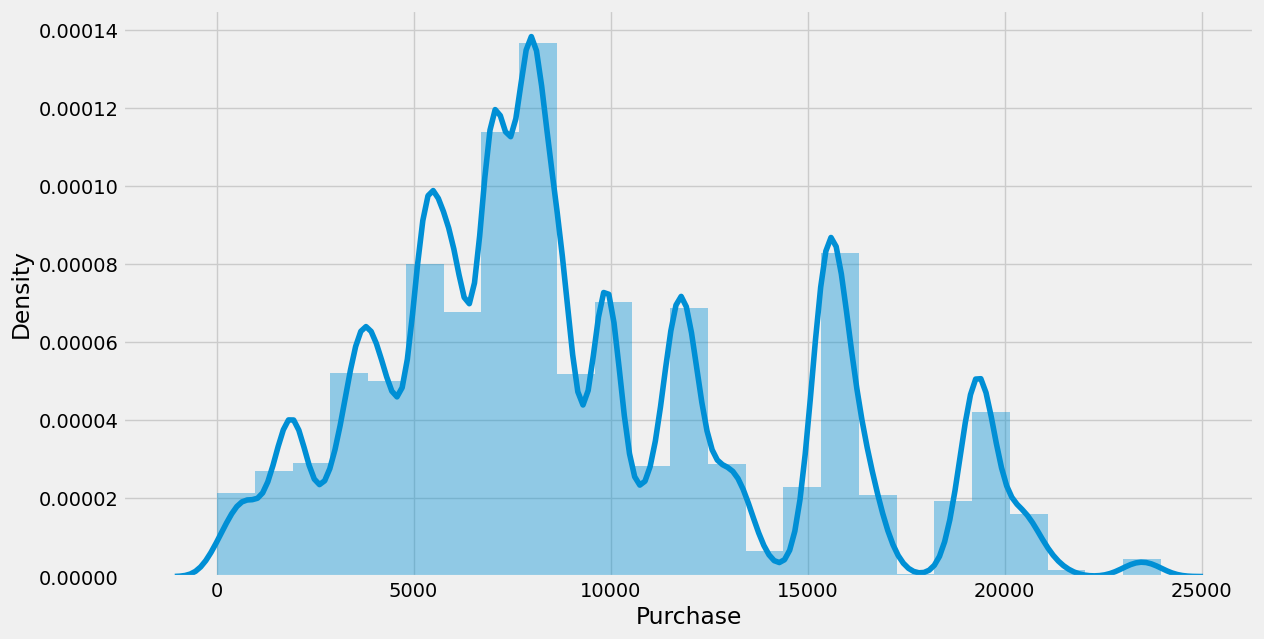

In [ ]:
# distplot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['Purchase'], bins=25)

<Axes: ylabel='count'>

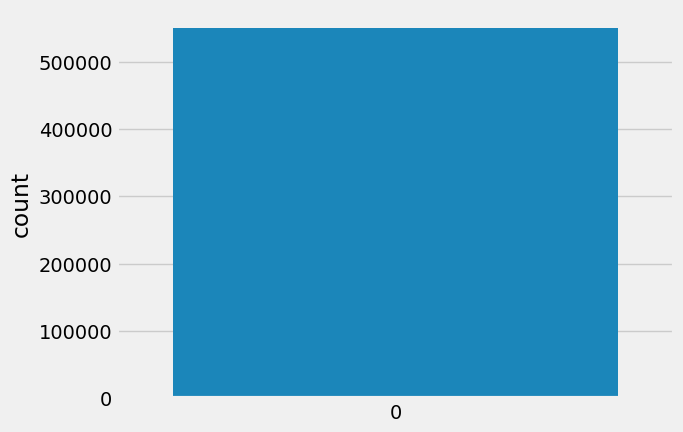

In [ ]:
sns.countplot(df['Marital_Status'])

<Axes: ylabel='count'>

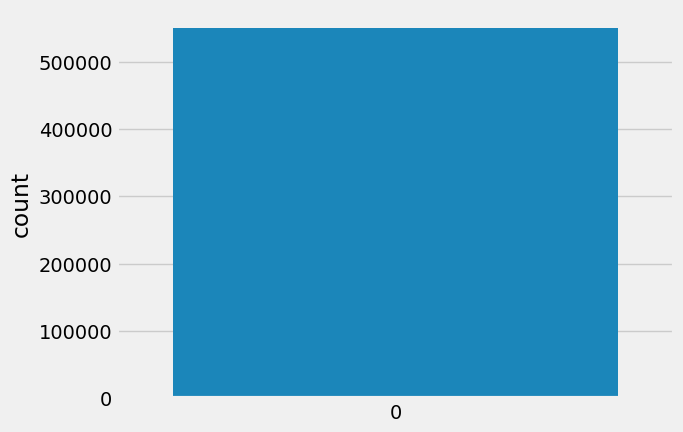

In [ ]:
sns.countplot(df['Occupation'])

<Axes: ylabel='count'>

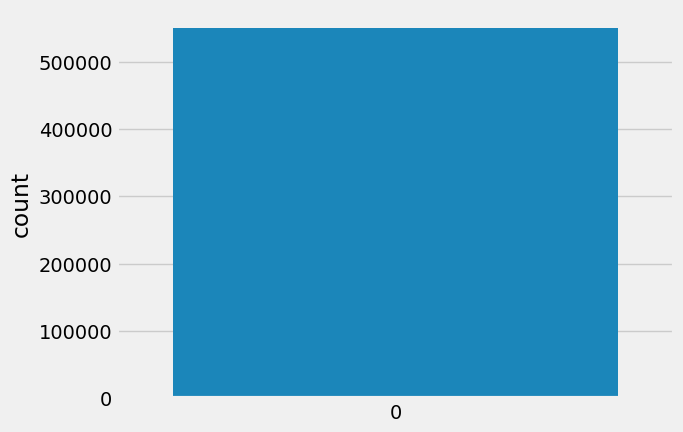

In [ ]:
sns.countplot(df['Product_Category_1'])

<Axes: ylabel='count'>

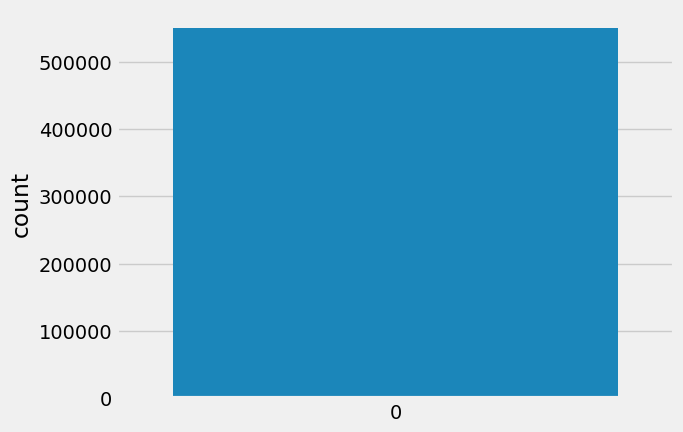

In [ ]:
sns.countplot(df['Product_Category_2'])

<Axes: ylabel='count'>

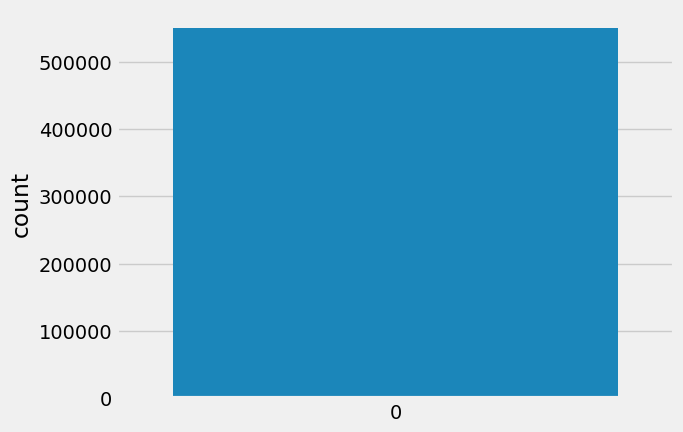

In [ ]:
sns.countplot(df['Product_Category_3'])

<Axes: ylabel='count'>

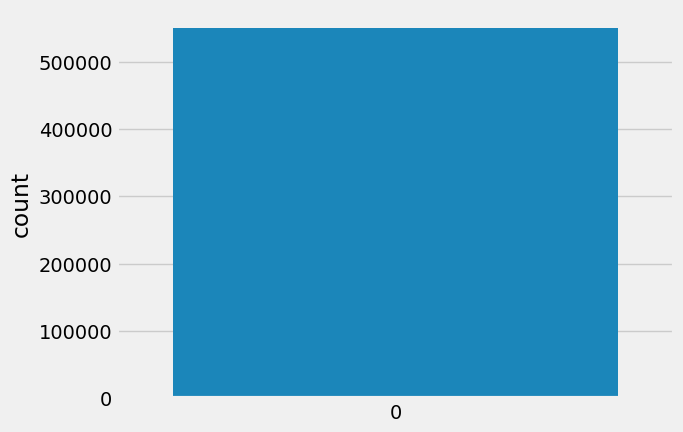

In [ ]:
sns.countplot(df['City_Category'])

<Axes: ylabel='count'>

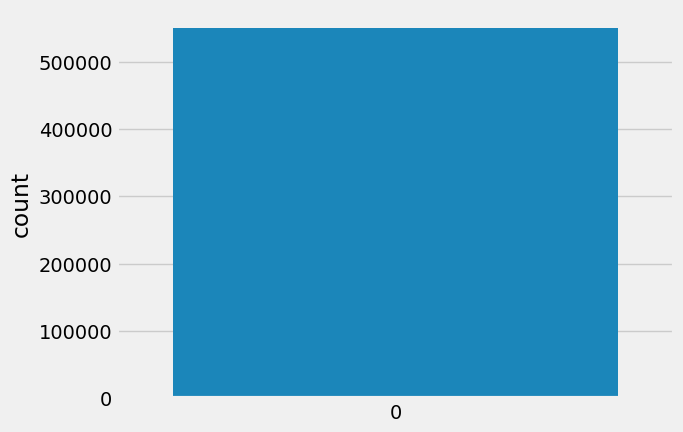

In [ ]:
sns.countplot(df['Stay_In_Current_City_Years'])

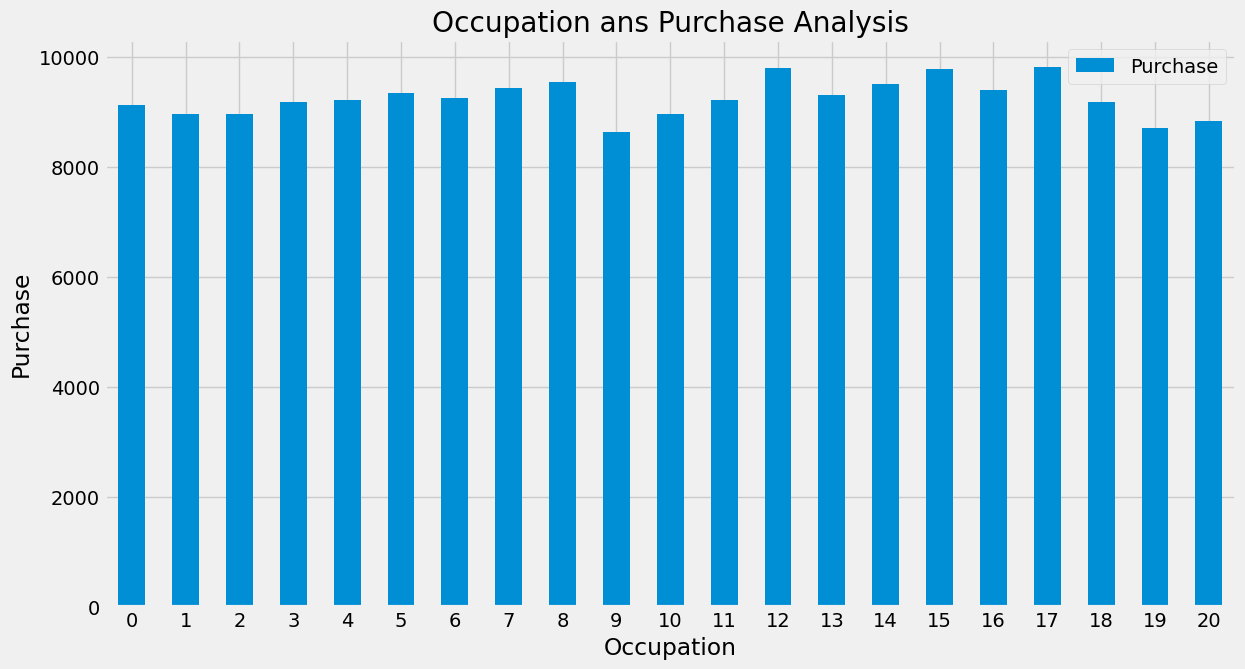

In [ ]:
#bivariate analysis
occupation_plot = df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Occupation')
plt.ylabel("Purchase")
plt.title("Occupation ans Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

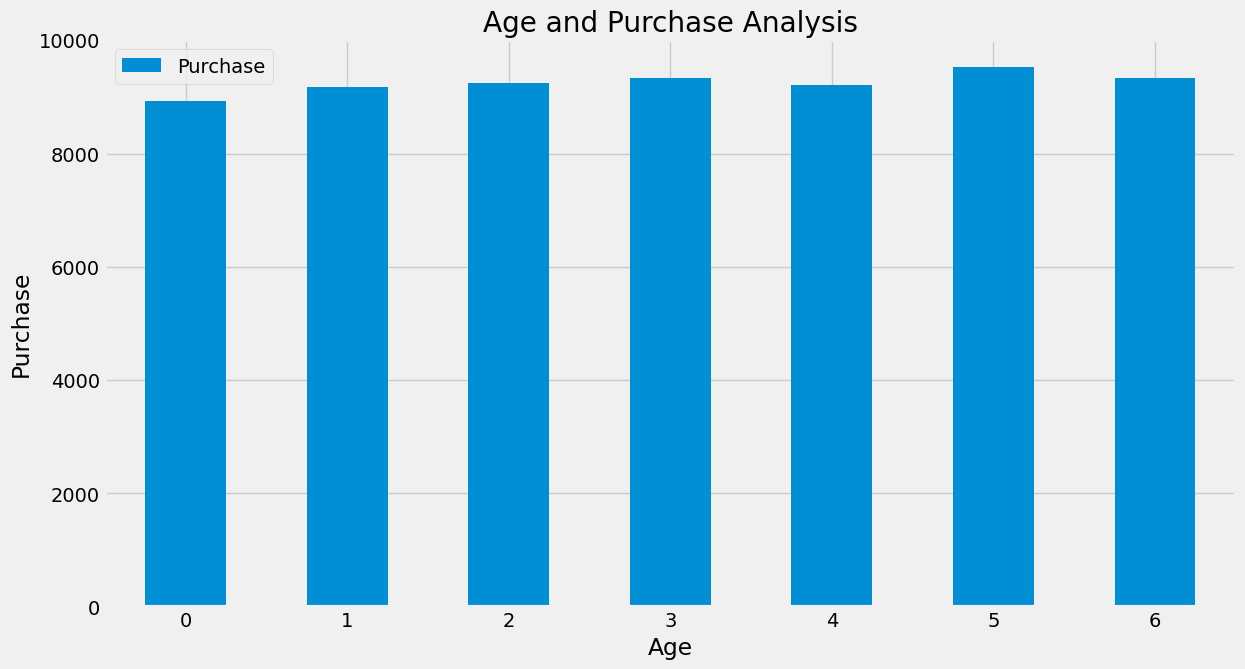

In [ ]:
age_plot = df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Age')
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

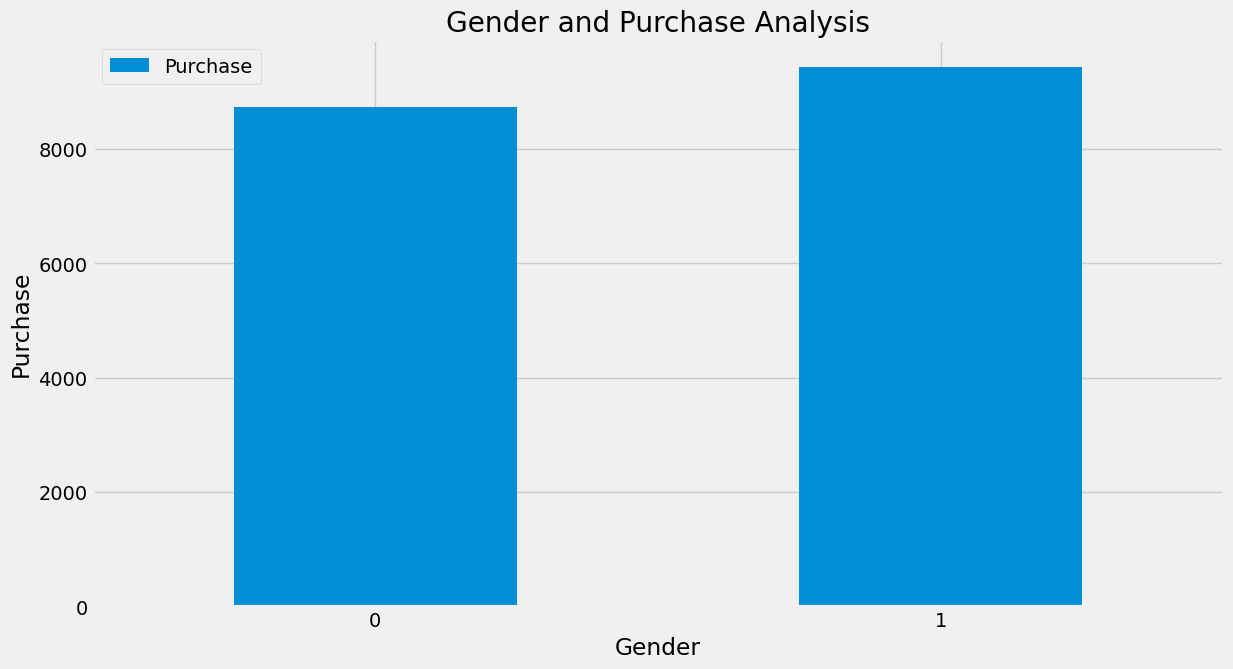

In [ ]:
age_plot = df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13, 7))
plt.xlabel('Gender')
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

## Coorelation Matrix



<Axes: >

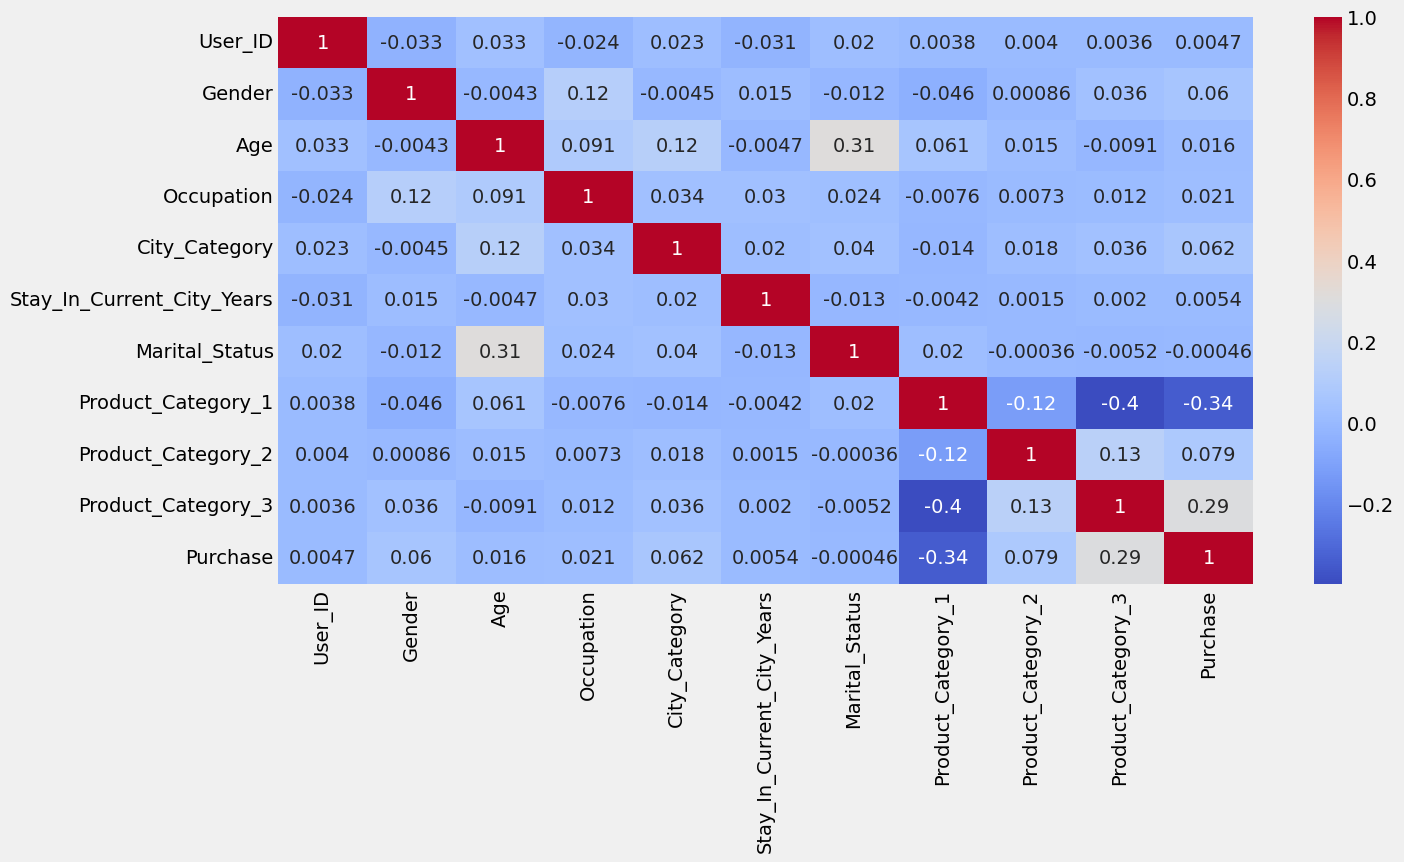

In [ ]:
corr = df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Input Split

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,-2.0,-2.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,-2.0,-2.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,-2.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,-2.0,-2.0,7969


In [ ]:
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

In [ ]:
X

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,-2.0,-2.0
1,0,0,10,0,2,0,1,6.0,14.0
2,0,0,10,0,2,0,12,-2.0,-2.0
3,0,0,10,0,2,0,12,14.0,-2.0
4,1,6,16,2,4,0,8,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,1,20,-2.0,-2.0
550064,0,2,1,2,3,0,20,-2.0,-2.0
550065,0,2,15,1,4,1,20,-2.0,-2.0
550066,0,6,1,2,2,0,20,-2.0,-2.0


In [ ]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

## Model Training

In [ ]:

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

def train_and_evaluate(model, X, y):
    model.fit(x_train, y_train)

    # Predict the results
    pred = model.predict(x_test)

    # Calculate the Mean Squared Error (MSE) on the test set
    mse = mean_squared_error(y_test, pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_scores = np.abs(cv_scores)

    # Calculate the mean cross-validated MSE
    cv_mse = np.mean(cv_scores)

    # Calculate the variance of the target variable
    variance = np.var(y_test)

    # Calculate accuracy
    accuracy = 1 - (mse / variance)

    print("Results")
    print("MSE:", np.sqrt(mse))
    print("CV MSE:", np.sqrt(cv_mse))
    print("Accuracy:", accuracy)

# Usage:
# train_and_evaluate(your_model, X, y)

**Linear** **Regression**

Results
MSE: 4617.994034201719
CV MSE: 4625.252945835687
Accuracy: 0.15218953776879318


<Axes: title={'center': 'Model Coefficients'}>

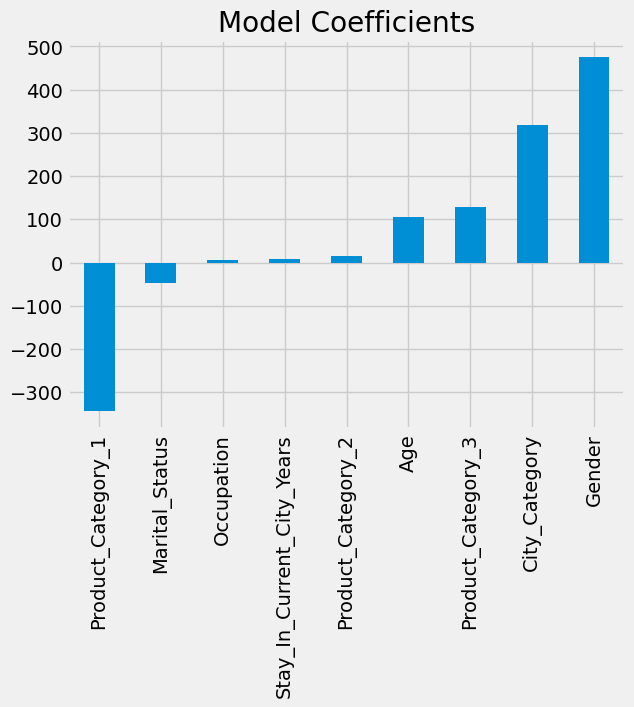

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train_and_evaluate(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

**Decision Tree**

Results
MSE: 3366.4024462149114
CV MSE: 3339.5592835114653
Accuracy: 0.5494695966899387


<Axes: title={'center': 'Feature Importance'}>

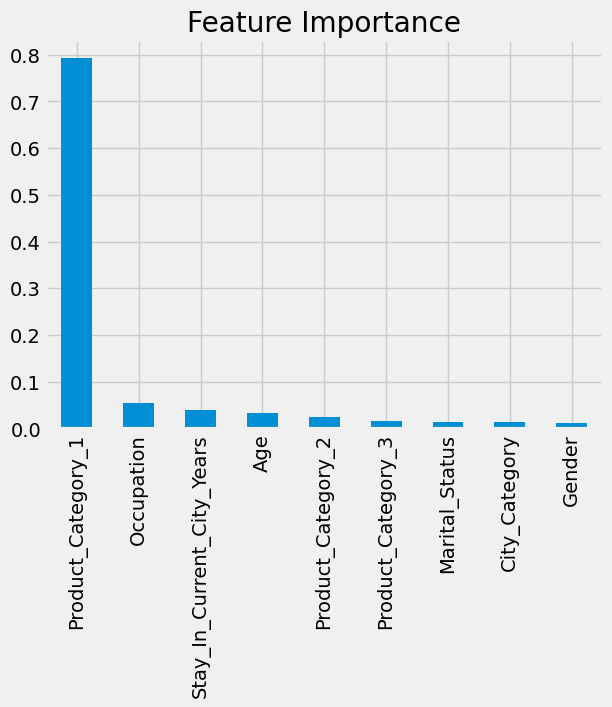

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train_and_evaluate(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

**Random Forest **

Results
MSE: 3063.4495959152187
CV MSE: 3052.9093673335624
Accuracy: 0.6269100807262988


<Axes: title={'center': 'Feature Importance'}>

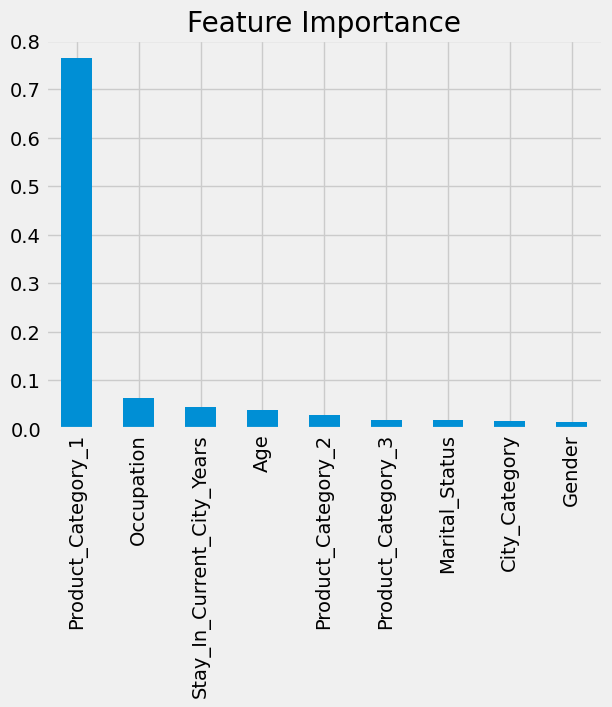

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
train_and_evaluate(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

**Extra Tree Regressor**

Results
MSE: 3194.300514108859
CV MSE: 3180.210834710643
Accuracy: 0.5943573798506303


<Axes: title={'center': 'Feature Importance'}>

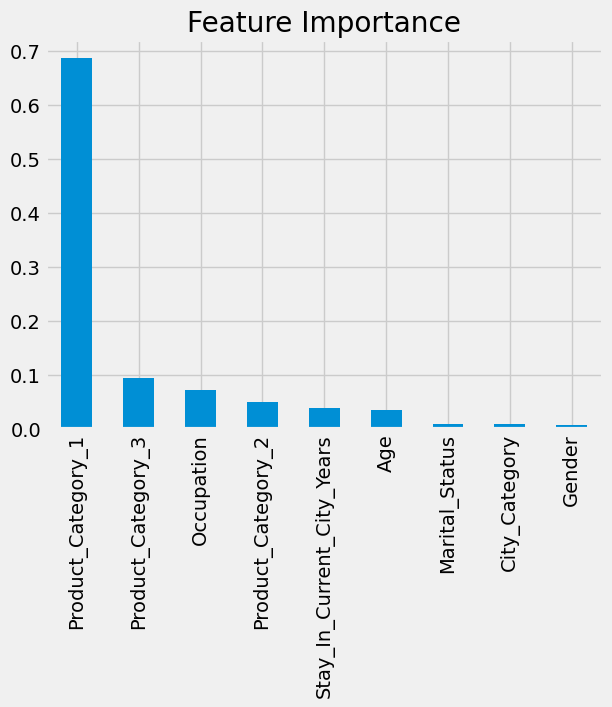

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs=-1)
train_and_evaluate(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

**XGBoost**

In [ ]:
pip install xgboost

In [ ]:
---import pandas as pd
import numpy as np
import xgboost as xgb  # Import XGBoost
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import warnings

# Assuming 'X' contains your feature columns and 'y' contains your target variable
X = df.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = df['Purchase']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# Create and train an XGBoost regression model
model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
model.fit(x_train, y_train)

# Predict the results
pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, pred)


# Cross-validation
cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

# Calculate the variance of the target variable
variance = np.var(y_test)

# Calculate accuracy
accuracy = 1 - (mse / variance)

# Evaluate and display the results
print("Results")
print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("CV Score:", np.sqrt(cv_score))
print("Accuracy:", accuracy)

Results
MSE: 2996.304148234083
CV Score: 2993.5694848933645
Accuracy: 0.6430857994321113


<Axes: title={'center': 'Feature Importance'}>

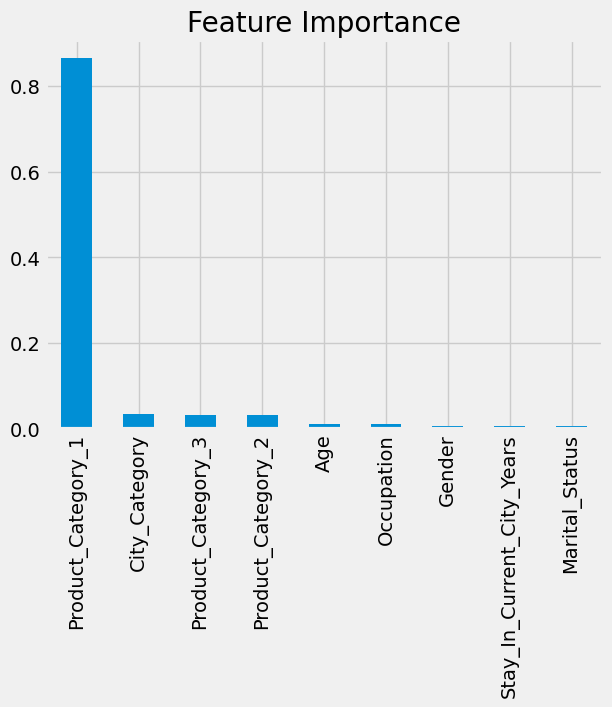

In [ ]:
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [ ]:
model_filename = 'Black_friday_model.joblib'
joblib.dump(model, model_filename)

['Black_friday_model.joblib']